# 로지스틱 회귀분류 모델

In [59]:
### 데이터 준비하기
import pandas as pd

fish = pd.read_csv('./data/05_생선_분류_데이터셋.csv')
fish.head(10)

# 종 / 무게 / 길이 / 대각선 / 높이 / 두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [60]:
### 종류 특성의 고유한 값 조회
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [61]:
### 독립변수 추출하기
# - 변수명은 fish_input
# - 사이킷런 훈련에 사용하는 형태로 만들기
# import numpy as np

fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_input = fish_input.to_numpy()
fish_input[0:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [62]:
### 종속변수 만들기
# - 변수명 : fish_target

fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [202]:
### 훈련/테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(train_input.shape)
print("-----------------------")
print(train_target.shape)
print("-----------------------")
print(test_input.shape)
print("-----------------------")
print(test_target.shape)
print("-----------------------")

(119, 5)
-----------------------
(119,)
-----------------------
(40, 5)
-----------------------
(40,)
-----------------------


In [64]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled

In [65]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)
print("-----------------------")
print(train_scaled[ :5])
print("-----------------------")
print(test_scaled[ :5])

[393.27226891  28.49663866  31.2697479    8.86248403   4.44828655] [355.27097574  10.67118899  11.5129708    4.04941829   1.64047206]
-----------------------
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
-----------------------
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [79]:
### k-최근접이웃분류 모델로 테스트
from sklearn.neighbors import KNeighborsClassifier

kn =KNeighborsClassifier()

kn.n_neighbors=3
kn.fit(train_scaled, train_target)
print(kn.score(test_scaled, test_target))
print(kn.score(train_scaled, train_target))

0.85
0.8907563025210085


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

In [74]:
# 상위 5개 예측하기
print(kn.predict(test_scaled[ : 5]))
print(test_target[ :5])

# [[실제값 , 예측값],[실제값 , 예측값],[],[],... ]
import numpy as np

np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [ ]:
### 각 행의 범주들의 확률값 확인
# - 확률값의 범위 : 0 ~ 1(0% ~ 100%)
# - 확률값 조회 함수 : predict_proba(테스트데이터)
# - 사이킷런 분류 모델 공통으로 사용됨

In [77]:
print(kn.classes_) #범주의 항목

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 범주의 항목으로 확인
# 결과가 perch이므로 1번째 행에서 prech의 위치 3번째에 1출력
# smelt니까 2번째 행에서 smelt 위치 6번째에 1출력
# ...

In [76]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [80]:
### 5개의 데이터의 이웃들 확인
distances, indexes = kn.kneighbors(test_scaled[:5])
print(distances)
print(indexes)

[[0.13880285 0.15188629 0.15908025]
 [0.07310337 0.10341686 0.11506625]
 [0.63337713 0.80646808 0.82050896]
 [0.20774583 0.24862983 0.33682411]
 [0.17898697 0.1859878  0.19013472]]
[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]


In [86]:
train_target[indexes]

array([['Perch', 'Perch', 'Perch'],
       ['Smelt', 'Smelt', 'Smelt'],
       ['Pike', 'Pike', 'Pike'],
       ['Roach', 'Perch', 'Perch'],
       ['Perch', 'Perch', 'Roach']], dtype=object)

In [87]:
for test_data in test_scaled[:5]:
    distandes, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])

[['Perch' 'Perch' 'Perch']]
[['Smelt' 'Smelt' 'Smelt']]
[['Pike' 'Pike' 'Pike']]
[['Roach' 'Perch' 'Perch']]
[['Perch' 'Perch' 'Roach']]


In [ ]:
# knn은 이웃의 개수에 제한을 받음
# knn은 거리적인 확률이지 범주적인 확률이 아님

## 로지스틱 회귀분류(Logistic Regression)

In [ ]:
### 선형방정식 사용 : 다중회귀 방정식과 동일
# - z = a * x1 + b * x2 .... + y절편
# - z값 구하는 함수 :decision_function(훈련데이터)
# - z값의 범위 : 0보다 작거나 크거나
### 확률 : 0~1 사이의 값을 사용(0% ~ 100%)
# - 따라서, z값은 확률의 0~1사이의 값으로 변환하는 작업이 필요
### 이때 사용하는 방법
# - 시그모이드 방식(이진분류방식 사용),
# - 소프트맥스 방식(다중분류방식 사용)
#   (모두 함수 지원됨)

### 로지스틱 회귀로 이진분류하기
##### - 시그모이드 함수 사용

In [137]:
train_scaled
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [118]:
### 이진분류 방식은 2개의 범주만 사용가능
# - 기존 데이터에서 2개(Bream과 Smelt) 범주만 추출하여 사용
# 독립변수명 : train_bream_smelt
# 종속변수명 : target_bream_smelt

In [151]:
B = np.where((train_target=='Bream') | (train_target=='Smelt'))
print(B)
# S = np.where(train_target=='Smelt')
# S

(array([  0,   2,   7,  11,  15,  16,  19,  21,  25,  28,  33,  36,  37,
        43,  49,  51,  54,  58,  65,  67,  77,  79,  82,  83,  87,  93,
        97,  99, 102, 103, 112, 113, 116], dtype=int64),)


In [152]:
print(train_scaled[B])
# train_scaled[S]

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [153]:
train_target[B]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [155]:
# train_bream_smelt = np.concatenate((train_scaled[B],train_scaled[S]))
# target_bream_smelt = np.concatenate((train_target[B],train_target[S]))
train_bream_smelt = train_scaled[B]
target_bream_smelt = train_target[B]
print(train_bream_smelt.shape)
print()
print(target_bream_smelt)

(33, 5)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [150]:
fish[(fish['Species'] == "Bream") | (fish['Species'] == "Smelt")].head(10)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


- 강사님

In [162]:
train_target == 'Bream' # true, false로 나옴
target_bream_smelt = train_target[(train_target == 'Bream') | (train_target == 'Smelt')]

train_bream_smelt = train_scaled[(train_target == 'Bream') | (train_target == 'Smelt')]
print(train_bream_smelt.shape)

(33, 5)


In [163]:
### 이진분류 
### 사용할 패키지 불러오기
from sklearn.linear_model import LogisticRegression

In [169]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [170]:
#예측 상위5개
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [175]:
### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

### 5개 행에 대한 범주별 확률 조회
proba = lr.predict_proba(train_bream_smelt[:5])
np.round(proba, decimals=4)

['Bream' 'Smelt']


array([[0.9976, 0.0024],
       [0.0274, 0.9726],
       [0.9949, 0.0051],
       [0.9858, 0.0142],
       [0.9977, 0.0023]])

In [176]:
### 결정계수(또는 가중치)와 y절편
print(lr.coef_, lr.intercept_) # 범주가 오름차순으로 정렬돼있음

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# -0.4037798 * Diagonal + -0.57620209 * Height + ... + -2.16155132

In [178]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#### <시그모이드 함수(sigmoid functions) 또는 로지스틱함수>
##### - 이진분류라고 함
##### - 범주 2개일 때 주로 사용됨
##### 
##### - 사용패키지 : from scipy.special
##### - 사용 모듈   : import expit
##### - 사용 함수   : expit(z값)
##### - 0/1, Y/N 처럼 둘 중 하나로 분류할 때
#####   (기존에 KNN처럼 사용 했었음)
##### - 시그모이드 값의 범위 : 0과 1 사잇값(0% ~ 100%)
##### - 범주들의 z값을 기준으로 0과 1의 사잇값으로 변환하여 반환
##### 
##### - 변환 공식 : 1 / (1 + np.exp(-z))
#####    : np.exp() : 지수값으로 변화하는 함수(0~1)
#####    : -z : z값은 음수 사용
#####    : z = 0일때, 확률은 0.5(50%)
#####    : z > 0일때, 확률 >  0.5(51% 이상)   -> 예측 확률이 높음
#####    : z < 0일때, 확률 <  0.5(49% 미만)
##### - 여러개 범주들 중에 확률이 가장 높은 범주 선택

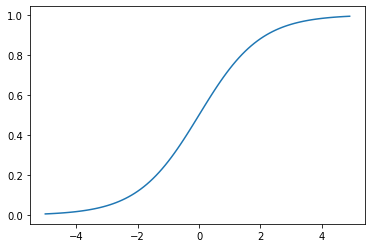

In [180]:
### 시그모이드 함수 예시
import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
z = np.arange(-5, 5, 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환
#            : z값의 스케일을 통일 시키기 위해
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

## 다중분류

In [181]:
### 다중분류는 모든 범주를 사용합니다.
# - 독립변수도 모든 특성을 사용합니다.
# - 모든 특성을 사용하다보니 복잡도에 대한 부분을 고려해야 함
#   (너무 복잡해도 안되고, 느슨해도 안되고, 적당해야함)
# - 사용하는 클래스 : 이진분류와 동일
# - 복잡도를 강약으로 조절하기 위해 규제강도 조절값 사용
# - 규제강도 조절값 속성명 : C (대문자), 기존의 alpha와 같음
#   : alpha 값은 클수록 강도가 커졌다면
#   : C값은 작을수록 강도가 커집니다
#   : 기본값은 1, 보통 20 정도로 완화 시킨 후 진행

# - 훈련반복횟수 사용
#   : 훈련모델은 정확도를 높이기 위해 일반적으로 반복수행을 합니다.
#   : 기본 반복횟수 : 100회
#   : 훈련 중에 100회보다 더 해야 하는 경우 경고 창이 뜰 수 있음
#   : 독립변수의 특성이 많을수록 훈련 반복횟수가 늘어나는 경우 발생
#   : 반복횟수 속성값 : max_iter
#   : 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
# - 이외 모든 훈련 함수는 기존과 동일

In [182]:
### 규제강도 = 20
### 반복횟수 = 1000회
# 훈련데이터와 테스트데이터에 대한 정확도 확인
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [189]:
# 상위 5건으로 예측 진행
print(lr.predict(test_scaled[:5]))

# 전체 범주별 확률 확인
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [190]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [193]:
# 계수와 y절편
print(lr.coef_, lr.intercept_)

[[-1.49001669 -1.02911188  2.59344182  7.70358216 -1.20070535]
 [ 0.19618154 -2.01070049 -3.77975316  6.50491991 -1.99481795]
 [ 3.56280088  6.34356158 -8.48970479 -5.75757495  3.79306719]
 [-0.10458248  3.60320123  3.93067908 -3.61738454 -1.75069682]
 [-1.40061602 -6.07502954  5.2596964  -0.87219392  1.86043801]
 [-1.38526513  1.49213827  1.39225555 -5.67734539 -4.40097836]
 [ 0.62149789 -2.32405917 -0.90661489  1.71599673  3.69369327]] [-0.09205102 -0.26290669  3.25101219 -0.14742096  2.65498547 -6.78784574
  1.38422676]


In [197]:
# z값 조회하기
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=3))

# ### 시그모이드 함수 : 싸이파이 패키지의 expit()
# from scipy.special import expit
# print(expit(decisions))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [201]:
### 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax

from scipy.special import softmax

proba = softmax(decisions, axis=1)
print(np.round(proba,  decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
